# Supermarket Data Analysis

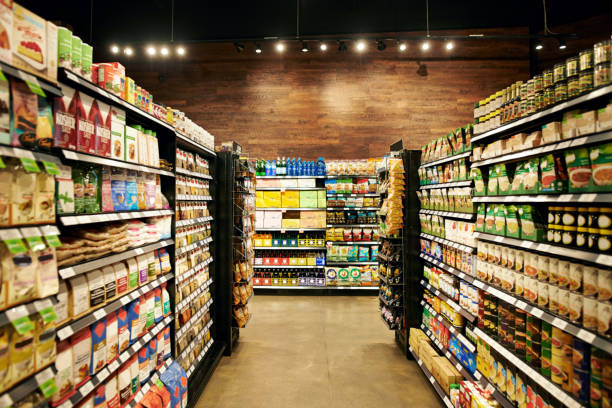

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv


**Predictive Marketing : K-Means clustering & PCA**

In this project, I will be applying two important techniques, namely K-Means clustering and Principal Component Analysis (PCA), to analyze a supermarket dataset and develop a predictive marketing model.

The goal of the project is to identify customer segments or clusters based on their purchasing behavior and demographics using K-Means clustering. This technique will help you group similar customers together, enabling you to understand their preferences and target them with tailored marketing strategies. By segmenting customers, you can optimize your marketing efforts, personalize promotions, and improve customer satisfaction.

In [2]:
#Importing libarary
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv")
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [4]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [6]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [7]:
df["days_since_prior_order"].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

**Data Prepration and visualization**

Filling empty values

In [8]:
# fill null values with -1 and change type

df['days_since_prior_order'] = df['days_since_prior_order'].fillna(-1)
df['days_since_prior_order']=df['days_since_prior_order'].astype('int64')

 OUTLIER customers based on add_to_cart_order


In [9]:
# OUTLIER customers based on add_to_cart_order

# group the data by user_id and calculate the mean value for each user
df_mean = df.groupby('user_id').mean()

# calculate the IQR for the addtocart_order feature
Q1 = df_mean['add_to_cart_order'].quantile(0.25)
Q3 = df_mean['add_to_cart_order'].quantile(0.75)
IQR = Q3 - Q1

# find the outlier threshold
outlier_threshold = Q3 + 1.5 * IQR

# find the outlier customers
outlier_customers = df_mean[df_mean['add_to_cart_order'] > outlier_threshold]
#outlier_customers = outlier_customers.reset_index()
outlier_customers

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
user_id,,,,,,,,,
10,8.339500e+04,4.000000,3.000000,15.000000,14.00000,60.000000,15.500000,0.433333,10.400000
133,2.415920e+05,11.000000,3.000000,13.000000,5.00000,68.133333,15.500000,0.400000,9.033333
197,2.357070e+05,7.000000,6.000000,14.000000,6.00000,74.206897,15.000000,0.793103,11.551724
216,1.500908e+06,5.000000,5.000000,15.000000,24.00000,68.448276,15.000000,0.172414,13.655172
264,3.022479e+06,29.000000,2.000000,9.000000,9.00000,79.551724,15.000000,0.827586,11.103448
...,...,...,...,...,...,...,...,...,...
205789,3.418993e+06,13.000000,6.000000,12.000000,7.00000,63.900000,15.500000,0.600000,9.466667
205926,2.385091e+06,11.000000,1.000000,15.000000,6.00000,73.828571,18.000000,0.514286,10.171429
205956,4.562900e+05,3.000000,3.000000,14.000000,30.00000,69.151515,17.000000,0.303030,10.909091


 OUTLIER customers in the purchases made by each customer

In [10]:
#  OUTLIER customers in the purchases made by each customer

# Group the data by user_id
grouped_data = df.groupby("user_id")["order_number"].agg(["mean", "std"])

# Calculate the lower and upper bounds for outliers
lower_bound = grouped_data["mean"] - 3 * grouped_data["std"]
lower_bound.name = 'order_number_lower'
upper_bound = grouped_data["mean"] + 3 * grouped_data["std"]
upper_bound.name = 'order_number_upper'

# join the lower and upper bounds to the original dataframe on user_id
df = df.join(lower_bound, on='user_id')
df = df.join(upper_bound, on='user_id')

# Identify the outliers
outliers = df[(df["order_number"] < df['order_number_lower']) | (df["order_number"] > df['order_number_upper'])]


outliers

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
2538,677735,175561,2,3,12,16,32,1,0,4,produce,packaged produce,7.467505,52.722971
8764,2018358,185514,22,4,17,17,128,1,0,3,bakery,tortillas flat bread,-5.770319,18.847242
8765,2018358,185514,22,4,17,17,54,2,1,17,household,paper goods,-5.770319,18.847242
15536,2545752,185279,9,5,9,12,84,1,0,16,dairy eggs,milk,10.001293,28.306399
16290,1365995,136421,1,3,10,-1,88,1,0,13,pantry,spreads,1.544766,74.812377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010592,1097536,97028,5,0,16,7,24,1,1,4,produce,fresh fruits,-0.146102,4.574673
2010593,1097536,97028,5,0,16,7,24,2,0,4,produce,fresh fruits,-0.146102,4.574673
2015806,1581072,93695,5,4,17,30,97,1,0,13,pantry,baking supplies decor,3.364384,4.740879
2016905,1373400,139870,11,2,12,30,116,1,0,1,frozen,frozen produce,-2.906531,10.137300


Distribution of orders by day of the week

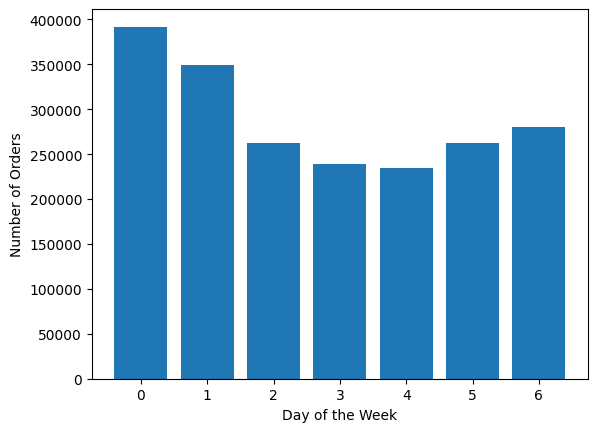

In [11]:
# distribution of orders by day of the week

order_dow_counts = df.groupby('order_dow').size()

plt.bar(order_dow_counts.index, order_dow_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

Distribution of orders by hour of the day

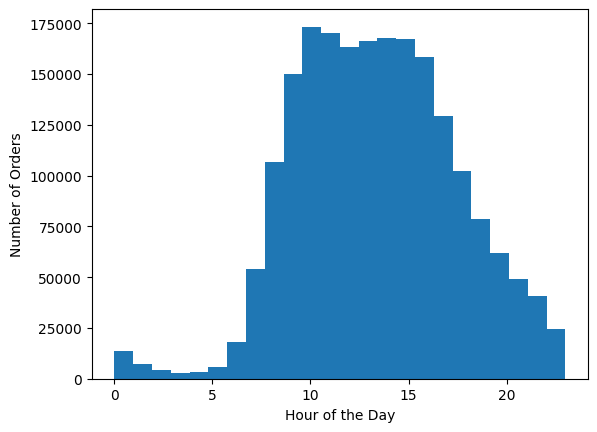

In [12]:
# distribution of orders by hour of the day

plt.hist(df['order_hour_of_day'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

Distribution of orders by department

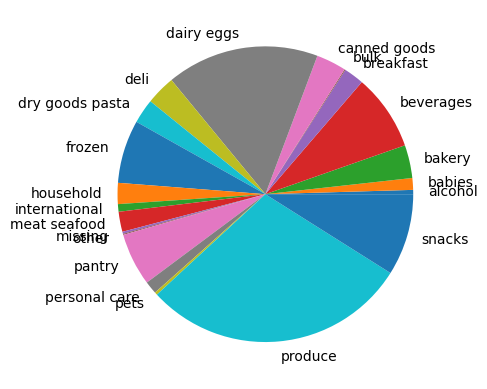

In [13]:
# distribution of orders by department

department_counts = df.groupby('department').size()
plt.pie(department_counts.values, labels=department_counts.index)
plt.show()

Relationship between the day of the week and hour of the day for orders

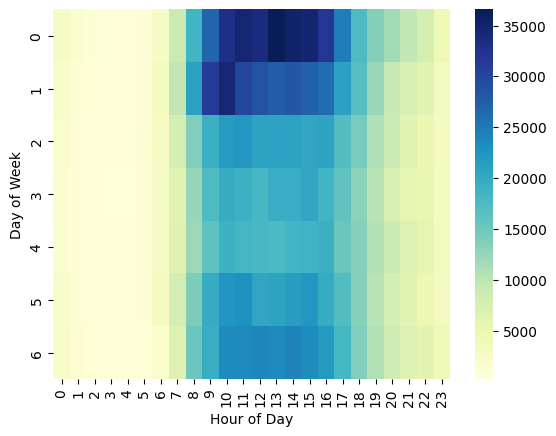

In [14]:
# relationship between the day of the week and hour of the day for orders

pivot = df.pivot_table(values='order_id', index='order_dow', columns='order_hour_of_day', aggfunc='count')
sns.heatmap(pivot, cmap='YlGnBu')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

Distribution of days since prior order

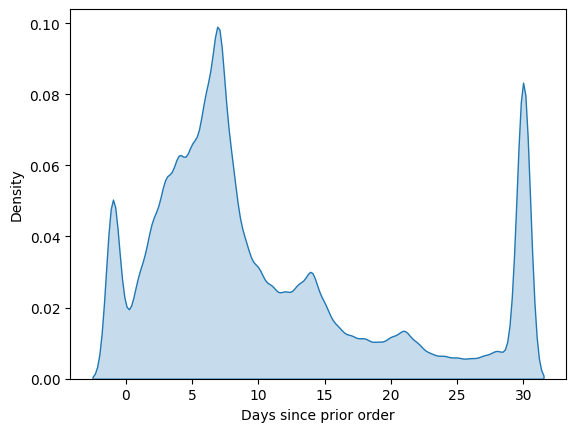

In [15]:
# distribution of days since prior order

sns.kdeplot(df['days_since_prior_order'], fill=True)
plt.xlabel('Days since prior order')
plt.show()

Relationship between the number of items added to cart and the reorder status

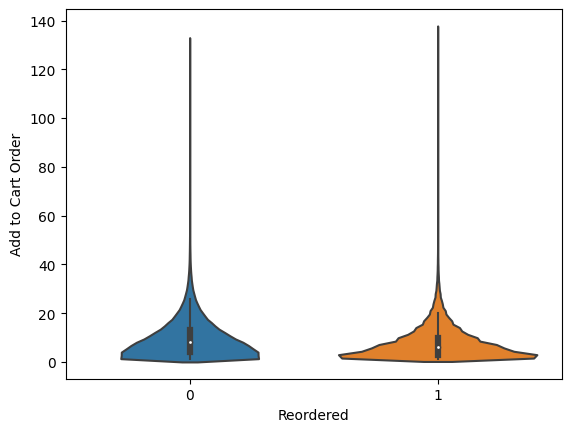

In [16]:
# relationship between the number of items added to cart and the reorder status

sns.violinplot(x='reordered', y='add_to_cart_order', data=df)
plt.xlabel('Reordered')
plt.ylabel('Add to Cart Order')
plt.show()

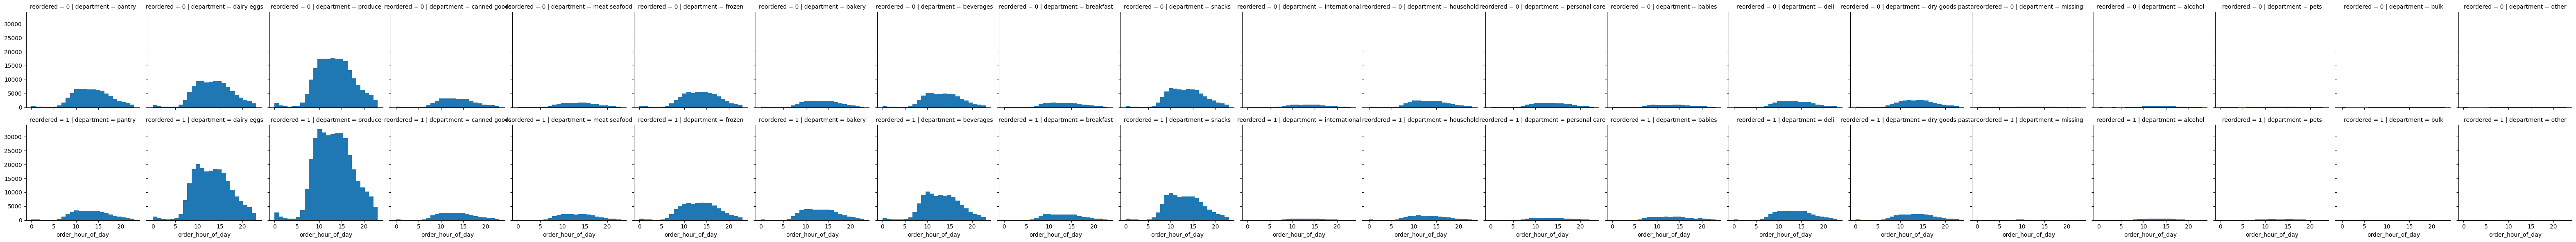

In [17]:
# distribution of reorders by department and hour of the day

g = sns.FacetGrid(df, col="department", row="reordered")
g = g.map(plt.hist, "order_hour_of_day",  bins=24)
plt.show()

In [18]:
# 2 Department Popularity

# Count number of products ordered per department
department_popularity = df.groupby('department')['product_id'].count().reset_index()

# Rename the column
department_popularity = department_popularity.rename(columns={'product_id':'product_count'})

# Sort the data by product_count
department_popularity = department_popularity.sort_values('product_count', ascending=False)
department_popularity

,department,product_count
19,produce,588996
7,dairy eggs,336915
20,snacks,180692
3,beverages,168126
10,frozen,139536
16,pantry,116262
2,bakery,72983
6,canned goods,66053
8,deli,65176
9,dry goods pasta,54054


In [19]:
# INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

In [20]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name',
       'order_number_lower', 'order_number_upper'],
      dtype='object')

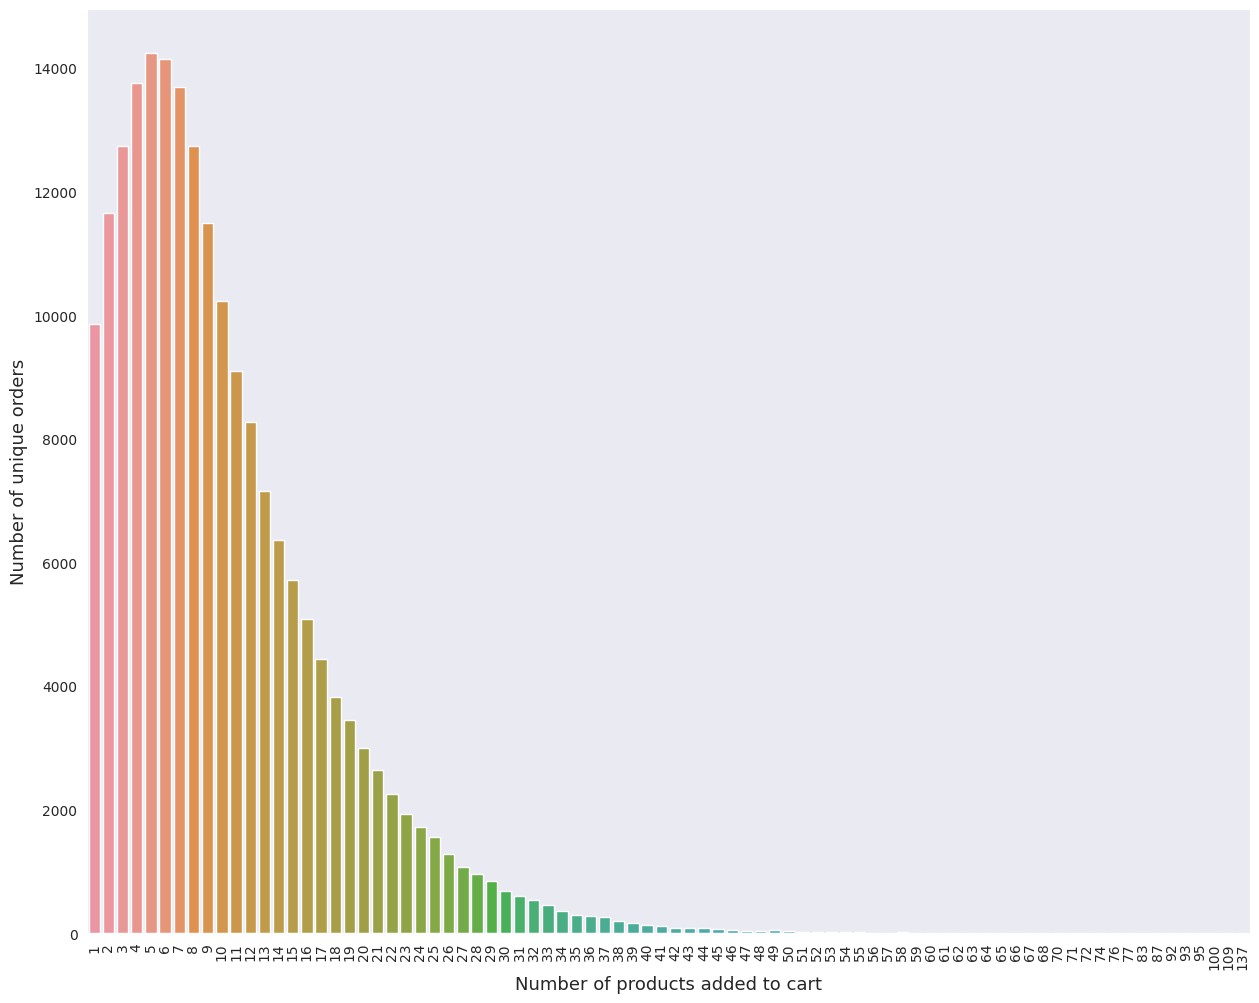

In [21]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values) 
sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

In [22]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


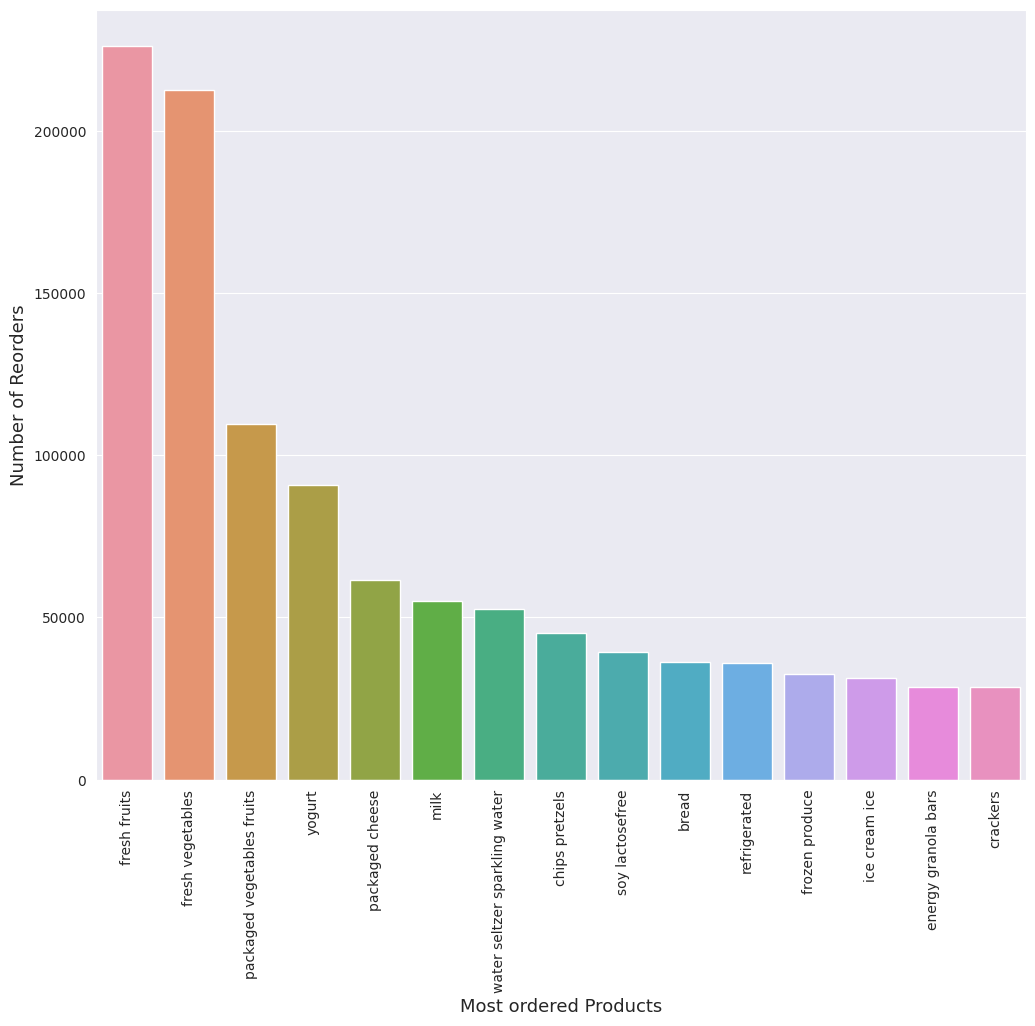

In [23]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE & IDENTIFY THE MOST REORDERED ITEMS
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index,y= grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

# Modelling K-Means

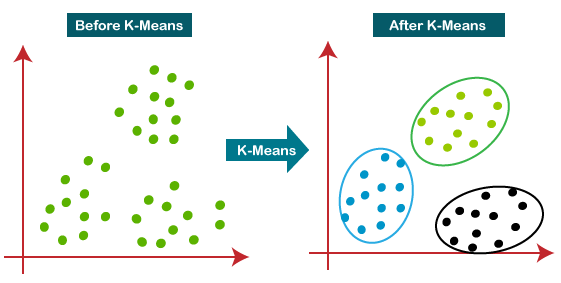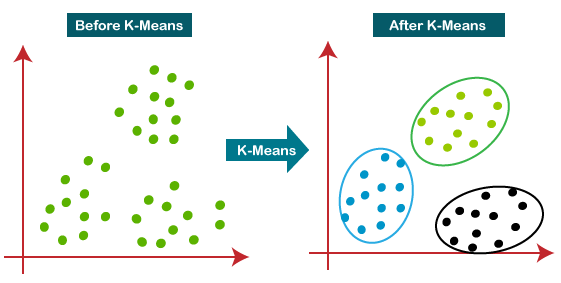

K-Means is an unsupervised learning algorithm that partitions the data into K distinct clusters based on similarity. You will determine the optimal number of clusters by using techniques such as the elbow method or silhouette score.

For futher Information 

https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

**Cluster Analysis**

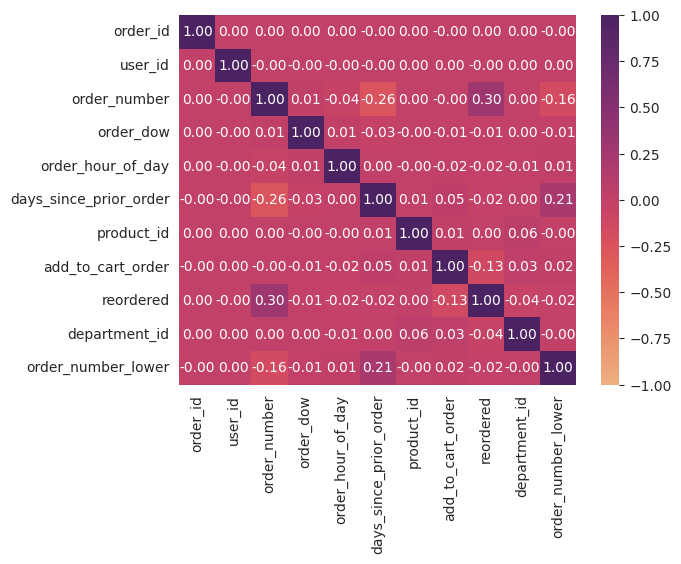

In [24]:
#check for any correlations in the dataset

sns.heatmap(df.iloc[:, :-1].corr(), 
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='flare',
            fmt='.2f')
plt.show()

In [25]:
# UNDERSTANDING DATA DISTRIBUTION BY USING CROSSTAB TO GET ROW WISE PROPORTION FOR EARCH DEPARTMENT
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [26]:
# RUNNING K-MEANS
X_train = clst_prd.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [5 0 2 ... 5 0 2]
The Inertia is : 4996208.594400609


In [27]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  7543563.6151223155
The inertia for : 3 Cluster is :  6284972.25627674
The inertia for : 4 Cluster is :  5731867.711694669
The inertia for : 5 Cluster is :  5281366.432549822
The inertia for : 6 Cluster is :  4996208.594400609
The inertia for : 7 Cluster is :  4763202.309826412
The inertia for : 8 Cluster is :  4586277.708068164
The inertia for : 9 Cluster is :  4436403.41166967


Text(0.5, 1.0, 'Inertia Plot per k')

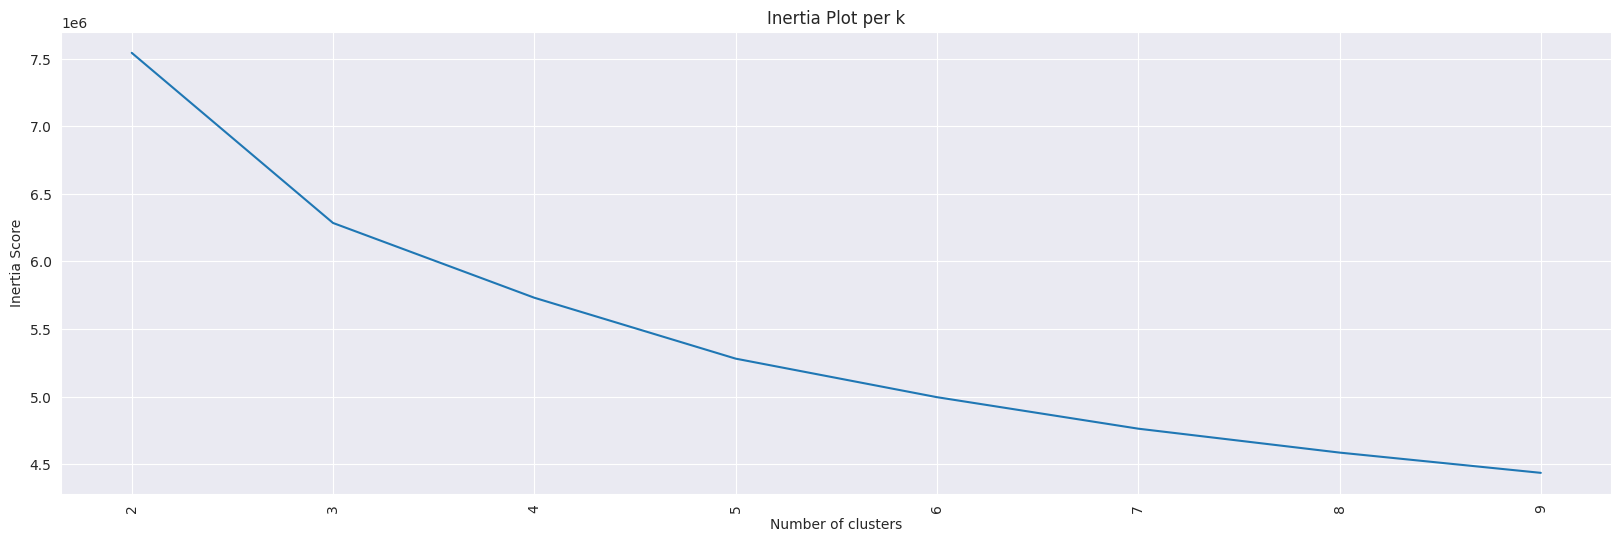

In [28]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [29]:
# RE-RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,62784,5843,8038,1926,26682


In [30]:
kmeans.labels_

array([0, 4, 0, ..., 0, 4, 0], dtype=int32)

In [31]:
predictions

array([0, 4, 0, ..., 0, 4, 0], dtype=int32)

# PCA

PCA, short for Principal Component Analysis, is a widely used dimensionality reduction technique in machine learning and data analysis. It aims to transform a dataset consisting of possibly correlated variables into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original variables and capture the maximum amount of variation present in the data.

For futher Information 

https://www.javatpoint.com/principal-component-analysis

In [32]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,-31.921436,69.180695
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,-31.921436,69.180695
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,-31.921436,69.180695
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,-31.921436,69.180695
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,-31.921436,69.180695


In [33]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = df.drop(['department','product_name'],axis=1)

pca_mod = PCA(n_components=5)

# fit the PCA model to the (scaled) features
pca_mod.fit(df.iloc[:, :-2])

PCA(n_components=5)

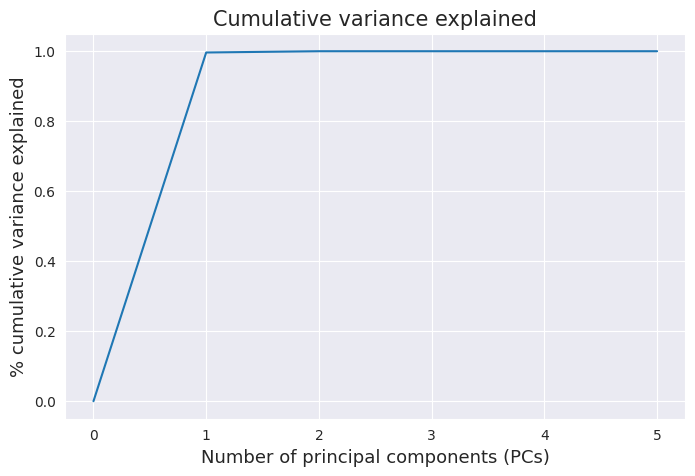

In [34]:
# plot the cumulative variance explained across all the components
# start the explained variance at 0
exp_variance = np.insert(pca_mod.explained_variance_ratio_, 0, 0)

# plot the explained variance
figure = plt.figure(figsize=(8, 5))

plt.plot(np.cumsum(exp_variance))
plt.xticks(range(0,6))
plt.xlabel("Number of principal components (PCs)", size=13)
plt.ylabel("% cumulative variance explained", size=13)
plt.title("Cumulative variance explained", size=15)

plt.show()

In [41]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(data_scaled)

pca_mod = PCA(n_components=3)

data_pca = pd.DataFrame(data=pca_mod.fit_transform(X_imputed),
                        columns=['PC1', 'PC2', 'PC3'])

# view data frame of PCs
data_pca.head()

,PC1,PC2,PC3
0,0.385057,1.241816,2.045498
1,0.328124,1.836133,0.541335
2,0.315869,1.641659,1.456028
3,0.354398,1.221401,1.707430
4,0.330758,1.287633,1.702011


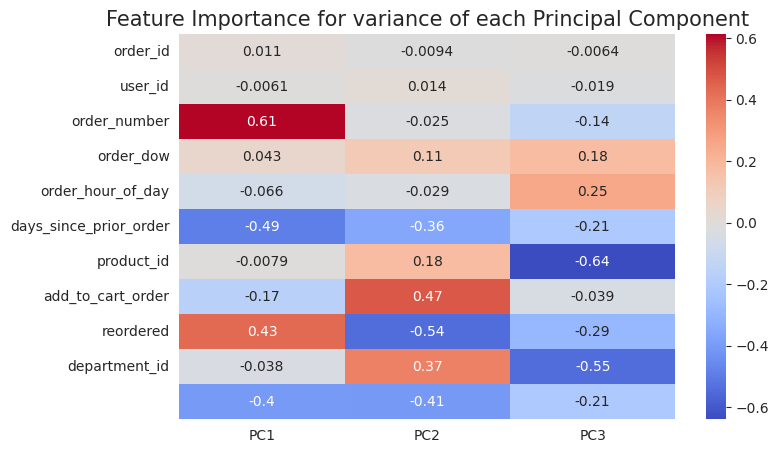

In [44]:
# feature importance for each component
figure = plt.figure(figsize=(8, 5))

sns.heatmap(pd.DataFrame(pca_mod.components_).transpose(),
            annot=True,
            # TASK: update the tick labels depending on your choice for the number of PCs
            xticklabels=['PC1', 'PC2', 'PC3'],
            yticklabels=df.iloc[:,:-2].columns,
            cmap='coolwarm')

plt.title('Feature Importance for variance of each Principal Component', fontsize=15)
plt.show()

* PC1 are mostly customers that reorder and order a large number of items at each order
* PC2 are influenced mostly by the day of the week
* PC3 are influenced by the hour of the day

# Plot the PCA data with the Clusters from the Kmeans¶

In [52]:
df2 = kmeans.labels_
df2 = pd.DataFrame(df2,columns=['cluster'])

In [53]:
# combine data for plotting
df.reset_index(drop=True, inplace=True)
data_pca.reset_index(drop=True, inplace=True)
plot_data = pd.concat([data_pca, df2['cluster']], axis=1)

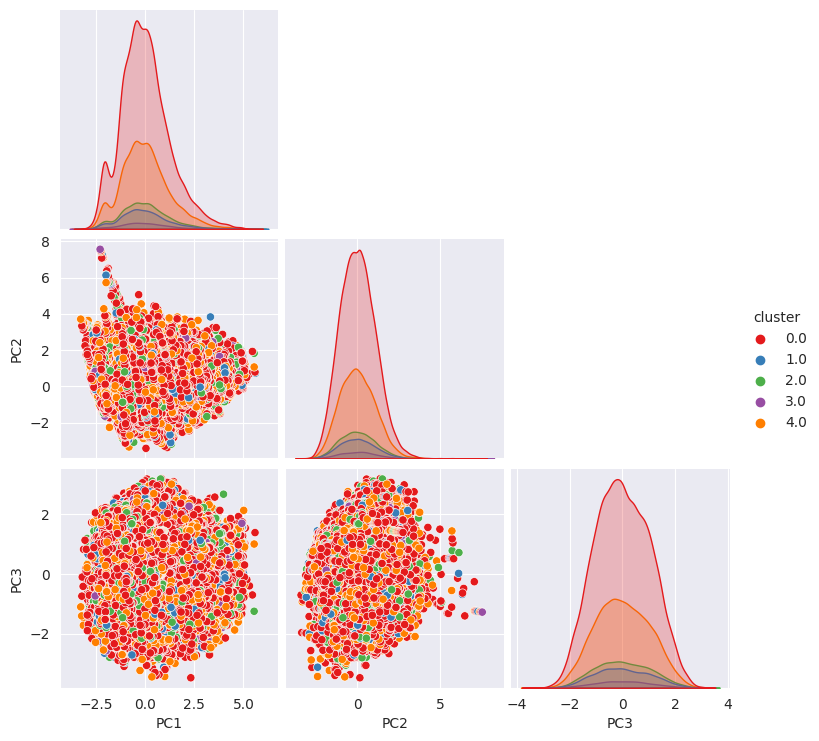

In [54]:
# visualise the clusters by plotting the PCAs in a scatter/pair plot, 
# with points colored by cluster membership
sns.pairplot(data=plot_data,
             hue='cluster',
             palette='Set1', 
             corner=True);